In [28]:
import pandas as pd
import numpy as np
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

%matplotlib inline

In [42]:
# load data
raw = pd.read_csv('../arima_fc/data/canola_oil_v2.csv')
raw.index = pd.to_datetime(raw.date).dt.date

In [43]:
raw.head()

,date,co,co_prod,co_domestic,ca_canola_crush,ca_co_exports,cent_ill_sbo
date,,,,,,,
2000-01-01,2000-01-01,NaN,NaN,NaN,273.365,78.335,15.56
2000-02-01,2000-02-01,NaN,NaN,NaN,231.914,98.451,15.09
2000-03-01,2000-03-01,NaN,NaN,NaN,301.705,87.800,16.22
2000-04-01,2000-04-01,NaN,NaN,NaN,205.655,81.074,17.52
2000-05-01,2000-05-01,NaN,NaN,NaN,265.540,61.784,16.75


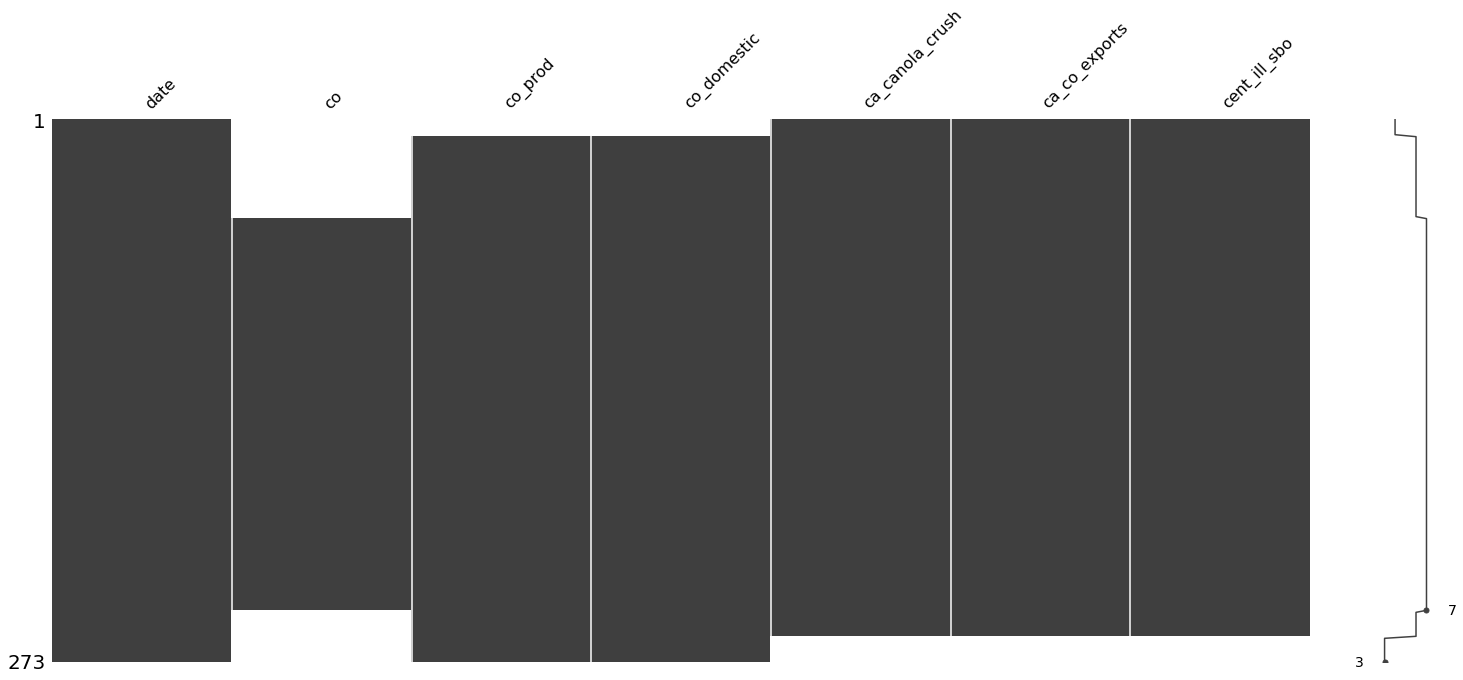

In [44]:
mn.matrix(raw)

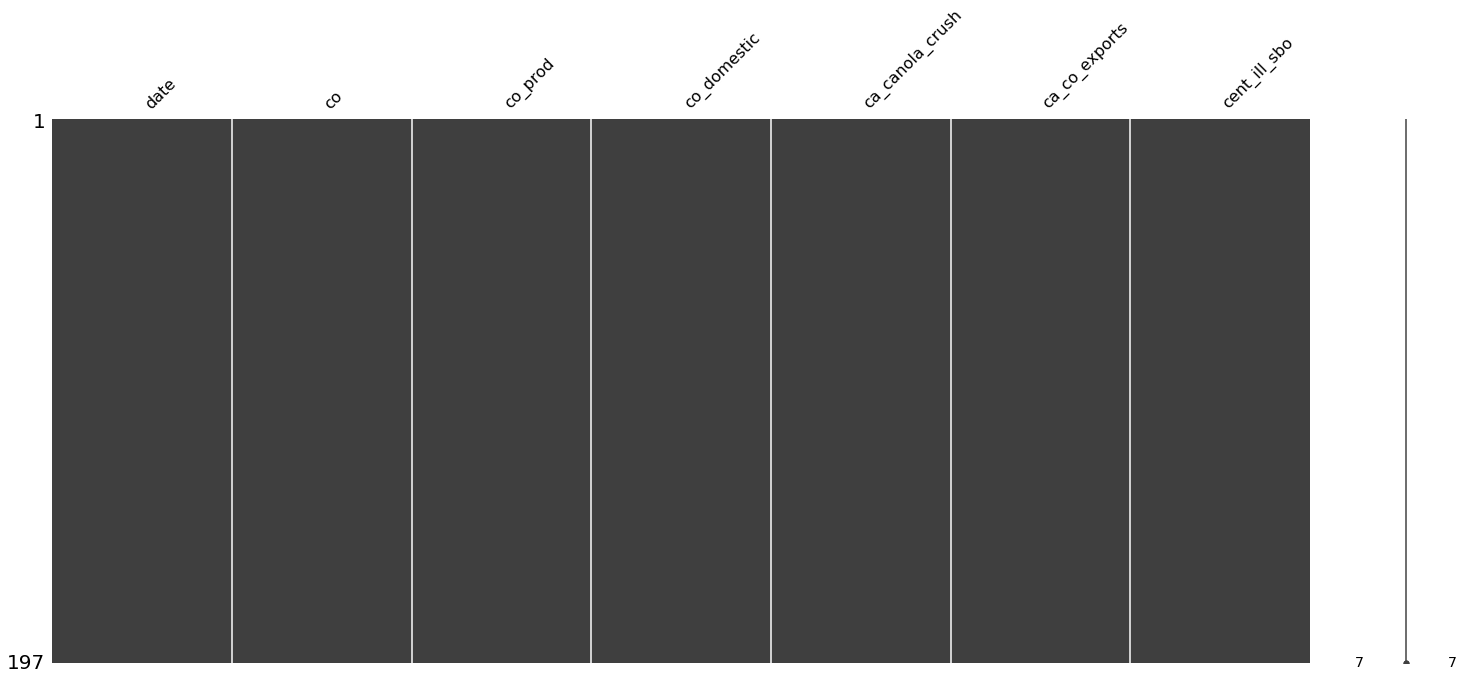

In [46]:
mn.matrix(raw[raw.co.notnull()])
df = raw[raw.co.notnull()]

In [52]:
df = df.T
dft.head()

date,2004-03-01,2004-04-01,2004-05-01,2004-06-01,2004-07-01,2004-08-01,2004-09-01,2004-10-01,2004-11-01,2004-12-01,...,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01
date,2004-03-01,2004-04-01,2004-05-01,2004-06-01,2004-07-01,2004-08-01,2004-09-01,2004-10-01,2004-11-01,2004-12-01,...,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01
co,40.39,39.85,38,35.32,33.98,31.95,32.15,29.85,33.93,32.17,...,38.78,37.58,38.44,38.57,35.87,33.25,33.33,32.5,35.28,41.95
co_prod,24,53,56,40,56,75,74,82,59,64,...,157,127,147,139,147,161,147,162,106,140
co_domestic,91,152,108,58,228,213,159,139,137,127,...,498,437,482,493,401,548,438,472,525,507
ca_canola_crush,325.247,307.567,288,234.607,306.664,259.121,223.777,288.74,274.977,283.584,...,882.301,829.303,899.331,854.686,812.633,881.384,845.459,855.008,864.559,815


date,2004-03-01,2004-04-01,2004-05-01,2004-06-01,2004-07-01,2004-08-01,2004-09-01,2004-10-01,2004-11-01,2004-12-01,...,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01
date,2004-03-01,2004-04-01,2004-05-01,2004-06-01,2004-07-01,2004-08-01,2004-09-01,2004-10-01,2004-11-01,2004-12-01,...,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01
co,40.39,39.85,38,35.32,33.98,31.95,32.15,29.85,33.93,32.17,...,38.78,37.58,38.44,38.57,35.87,33.25,33.33,32.5,35.28,41.95
co_prod,24,53,56,40,56,75,74,82,59,64,...,157,127,147,139,147,161,147,162,106,140
co_domestic,91,152,108,58,228,213,159,139,137,127,...,498,437,482,493,401,548,438,472,525,507
ca_canola_crush,325.247,307.567,288,234.607,306.664,259.121,223.777,288.74,274.977,283.584,...,882.301,829.303,899.331,854.686,812.633,881.384,845.459,855.008,864.559,815


In [65]:

data_start_date = df.columns[1]
data_end_date = df.columns[-1]

pred_steps = 90
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1) 

In [66]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2004-04-01 00:00:00 - 2020-01-03 00:00:00
Train prediction: 2020-01-04 00:00:00 - 2020-04-02 00:00:00 

Val encoding: 2004-06-30 00:00:00 - 2020-04-02 00:00:00
Val prediction: 2020-04-03 00:00:00 - 2020-07-01 00:00:00

Encoding interval: 5756
Prediction interval: 90


In [67]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = df[df.columns[1:]].values

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log(series_array)
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log(series_array)
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

TypeError: 'month' is an invalid keyword argument for __new__()